In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df1= pd.read_csv('messages.csv')

In [4]:
df1.head()

,sender,receiver,timestamp,message_length
0,79,48,2021-06-02 05:41:34,88
1,79,63,2021-06-02 05:42:15,72
2,79,58,2021-06-02 05:44:24,86
3,79,70,2021-06-02 05:49:07,26
4,79,109,2021-06-02 19:51:47,73


In [5]:
df2 = pd.read_csv('employees.csv')

In [6]:
df2.head()

,id,department,location,age
0,3,Operations,US,33
1,6,Sales,UK,50
2,8,IT,Brasil,54
3,9,Admin,UK,32
4,12,Operations,Brasil,51


In [7]:
df = df1.merge(df2, left_on='sender',right_on='id', how='left')

In [8]:
df.rename(columns={'department':'sender_department','location':'sender_location','age':'sender_age'},inplace=True)

In [9]:
df.head()

,sender,receiver,timestamp,message_length,id,sender_department,sender_location,sender_age
0,79,48,2021-06-02 05:41:34,88,79,Sales,France,33
1,79,63,2021-06-02 05:42:15,72,79,Sales,France,33
2,79,58,2021-06-02 05:44:24,86,79,Sales,France,33
3,79,70,2021-06-02 05:49:07,26,79,Sales,France,33
4,79,109,2021-06-02 19:51:47,73,79,Sales,France,33


In [10]:
df.drop(columns='id',inplace=True)

In [11]:
df.head()

,sender,receiver,timestamp,message_length,sender_department,sender_location,sender_age
0,79,48,2021-06-02 05:41:34,88,Sales,France,33
1,79,63,2021-06-02 05:42:15,72,Sales,France,33
2,79,58,2021-06-02 05:44:24,86,Sales,France,33
3,79,70,2021-06-02 05:49:07,26,Sales,France,33
4,79,109,2021-06-02 19:51:47,73,Sales,France,33


In [12]:
df = df.merge(df2, left_on='receiver',right_on='id', how='left')

In [13]:
df.isnull().sum()

sender               0
receiver             0
timestamp            0
message_length       0
sender_department    0
sender_location      0
sender_age           0
id                   0
department           0
location             0
age                  0
dtype: int64

In [14]:
df.head()

,sender,receiver,timestamp,message_length,sender_department,sender_location,sender_age,id,department,location,age
0,79,48,2021-06-02 05:41:34,88,Sales,France,33,48,IT,France,34
1,79,63,2021-06-02 05:42:15,72,Sales,France,33,63,Sales,France,38
2,79,58,2021-06-02 05:44:24,86,Sales,France,33,58,Sales,Germany,40
3,79,70,2021-06-02 05:49:07,26,Sales,France,33,70,Operations,France,47
4,79,109,2021-06-02 19:51:47,73,Sales,France,33,109,Marketing,Brasil,32


In [15]:
df.rename(columns= {'sender' : 'sender_id','id':'reciever_id','department':'receiver_department','location':'receiever_location'},inplace=True)

In [16]:
df.head()

,sender_id,receiver,timestamp,message_length,sender_department,sender_location,sender_age,reciever_id,receiver_department,receiever_location,age
0,79,48,2021-06-02 05:41:34,88,Sales,France,33,48,IT,France,34
1,79,63,2021-06-02 05:42:15,72,Sales,France,33,63,Sales,France,38
2,79,58,2021-06-02 05:44:24,86,Sales,France,33,58,Sales,Germany,40
3,79,70,2021-06-02 05:49:07,26,Sales,France,33,70,Operations,France,47
4,79,109,2021-06-02 19:51:47,73,Sales,France,33,109,Marketing,Brasil,32


In [17]:
df.drop(columns=['receiver','sender_age','age'],inplace=True)

In [18]:
df.head()

,sender_id,timestamp,message_length,sender_department,sender_location,reciever_id,receiver_department,receiever_location
0,79,2021-06-02 05:41:34,88,Sales,France,48,IT,France
1,79,2021-06-02 05:42:15,72,Sales,France,63,Sales,France
2,79,2021-06-02 05:44:24,86,Sales,France,58,Sales,Germany
3,79,2021-06-02 05:49:07,26,Sales,France,70,Operations,France
4,79,2021-06-02 19:51:47,73,Sales,France,109,Marketing,Brasil


## Q1  Which departments are the most/least active?

#### The Most Message sender department

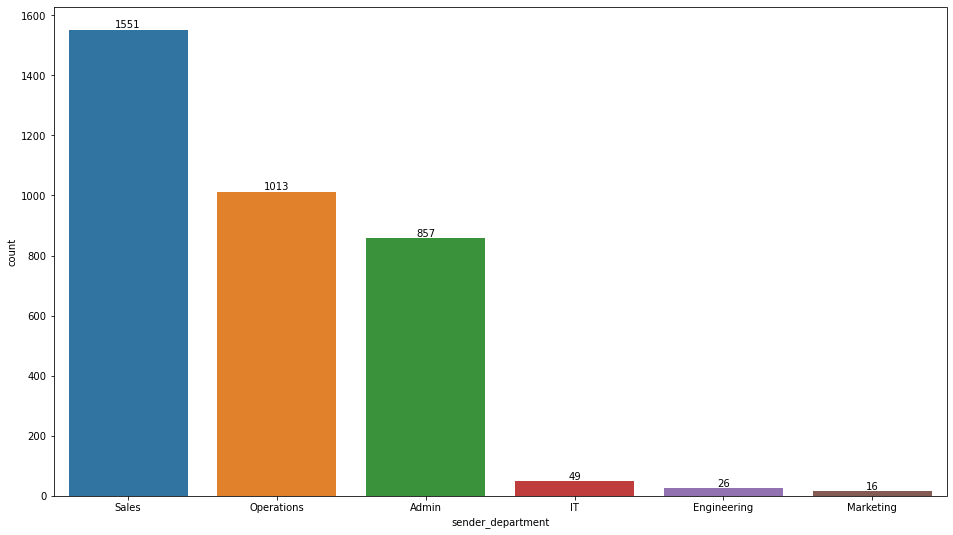

In [19]:
fig,ax = plt.subplots(figsize=(16,9))
ax = sns.countplot(data=df,x='sender_department',order=df['sender_department'].value_counts().index)
ax.bar_label(ax.containers[0]);

#### The Most Message Receiving Department

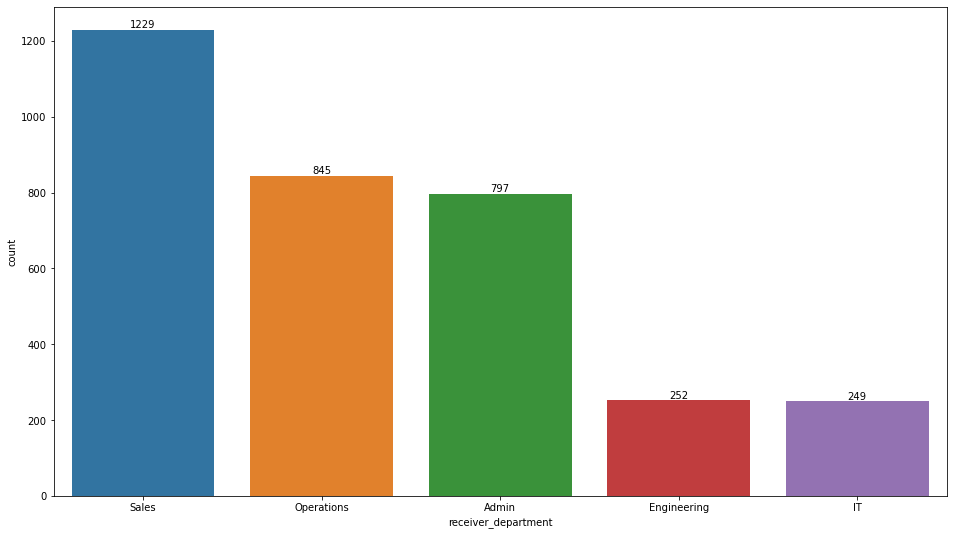

In [20]:
fig,ax = plt.subplots(figsize=(16,9))
ax = sns.countplot(data=df,x='receiver_department',order=df['receiver_department'].value_counts().iloc[:5].index)
ax.bar_label(ax.containers[0]);

#### Which employee has the most connections? 

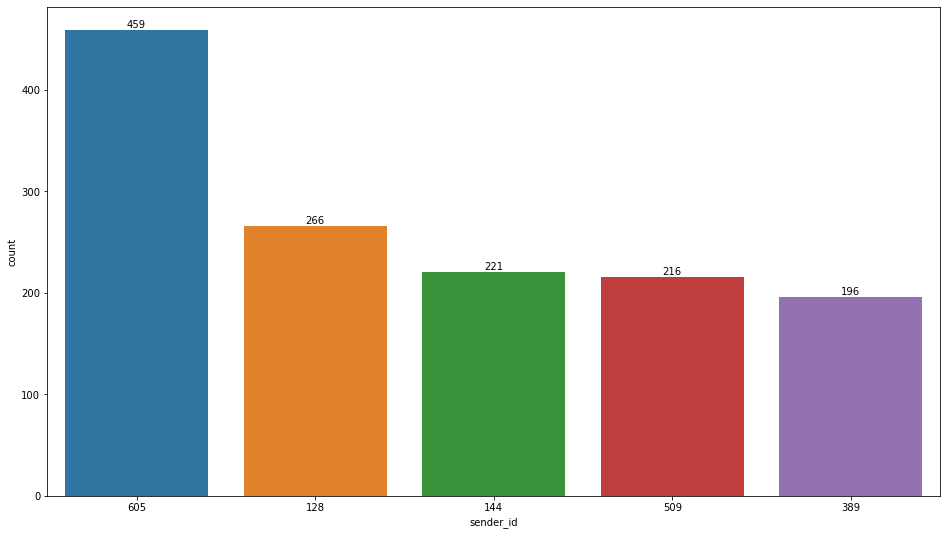

In [21]:
### The top 5 message Sender Employee 
fig,ax = plt.subplots(figsize=(16,9))
ax = sns.countplot(data=df,x='sender_id',order=df['sender_id'].value_counts(ascending=False).iloc[:5].index)
ax.bar_label(ax.containers[0]);


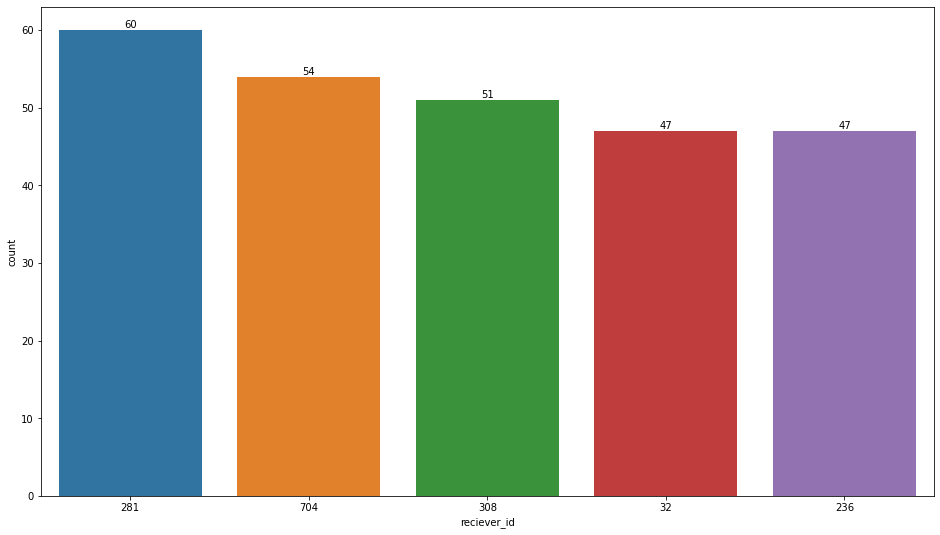

In [22]:
### Top 5 Message Recieving Employee

fig,ax = plt.subplots(figsize=(16,9))
ax = sns.countplot(data=df, x=df['reciever_id'],order=df['reciever_id'].value_counts(ascending=False).iloc[:5].index)
ax.bar_label(ax.containers[0]);

 ### Identify the most influential departments and employees.

In [23]:
df.head()

,sender_id,timestamp,message_length,sender_department,sender_location,reciever_id,receiver_department,receiever_location
0,79,2021-06-02 05:41:34,88,Sales,France,48,IT,France
1,79,2021-06-02 05:42:15,72,Sales,France,63,Sales,France
2,79,2021-06-02 05:44:24,86,Sales,France,58,Sales,Germany
3,79,2021-06-02 05:49:07,26,Sales,France,70,Operations,France
4,79,2021-06-02 19:51:47,73,Sales,France,109,Marketing,Brasil


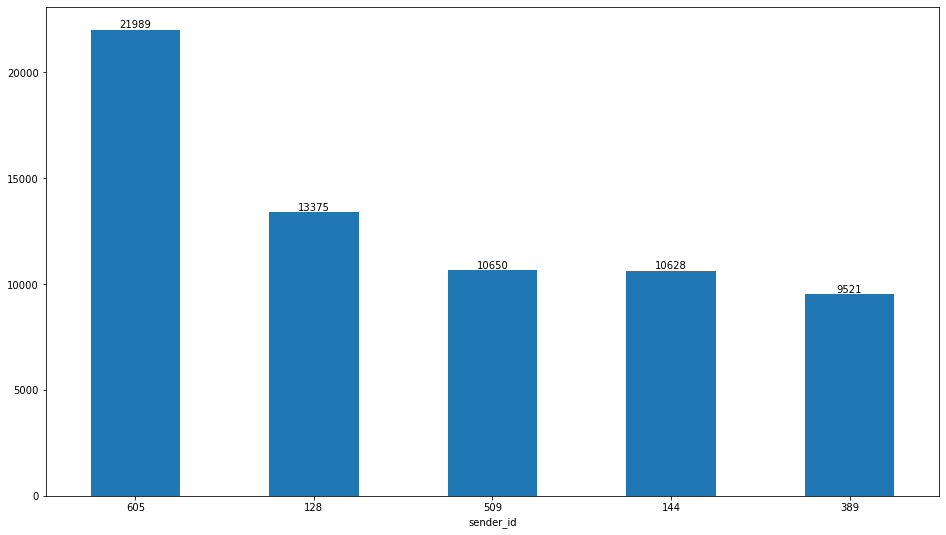

In [24]:
fig,ax = plt.subplots(figsize=(16,9))
ax = df.groupby(["sender_id"])['message_length'].sum().sort_values(ascending=False).iloc[:5].plot.bar()
ax.bar_label(ax.containers[0])
plt.xticks(rotation='horizontal');

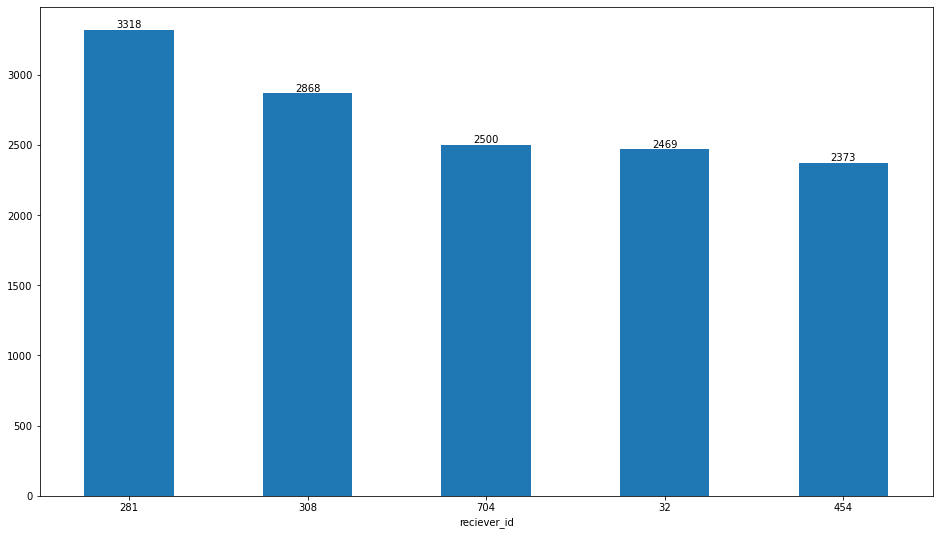

In [25]:
fig,ax = plt.subplots(figsize=(16,9))
ax = df.groupby(["reciever_id"])['message_length'].sum().sort_values(ascending=False).iloc[:5].plot.bar()
ax.bar_label(ax.containers[0])
plt.xticks(rotation='horizontal');


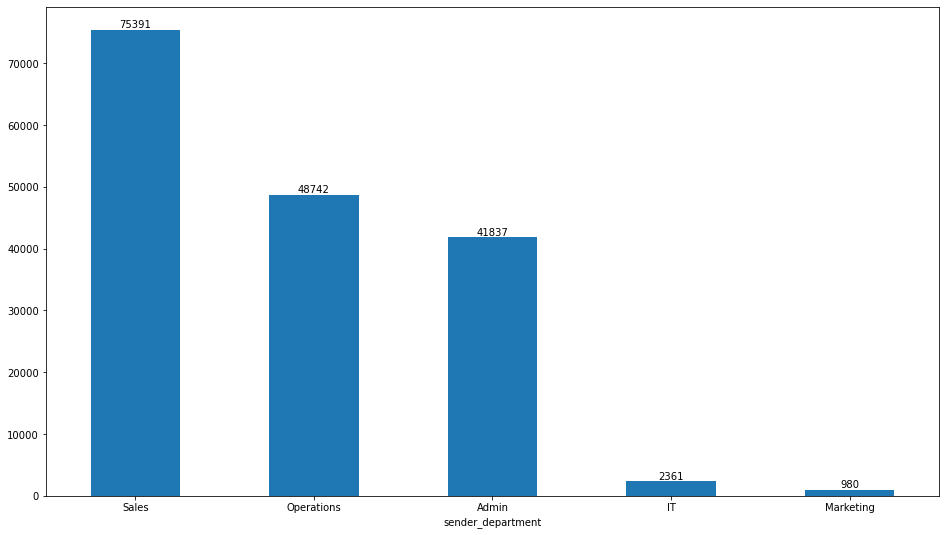

In [26]:
fig,ax = plt.subplots(figsize=(16,9))
ax = df.groupby(["sender_department"])['message_length'].sum().sort_values(ascending=False).iloc[:5].plot.bar()
ax.bar_label(ax.containers[0])
plt.xticks(rotation='horizontal');


In [27]:
df.head()

,sender_id,timestamp,message_length,sender_department,sender_location,reciever_id,receiver_department,receiever_location
0,79,2021-06-02 05:41:34,88,Sales,France,48,IT,France
1,79,2021-06-02 05:42:15,72,Sales,France,63,Sales,France
2,79,2021-06-02 05:44:24,86,Sales,France,58,Sales,Germany
3,79,2021-06-02 05:49:07,26,Sales,France,70,Operations,France
4,79,2021-06-02 19:51:47,73,Sales,France,109,Marketing,Brasil


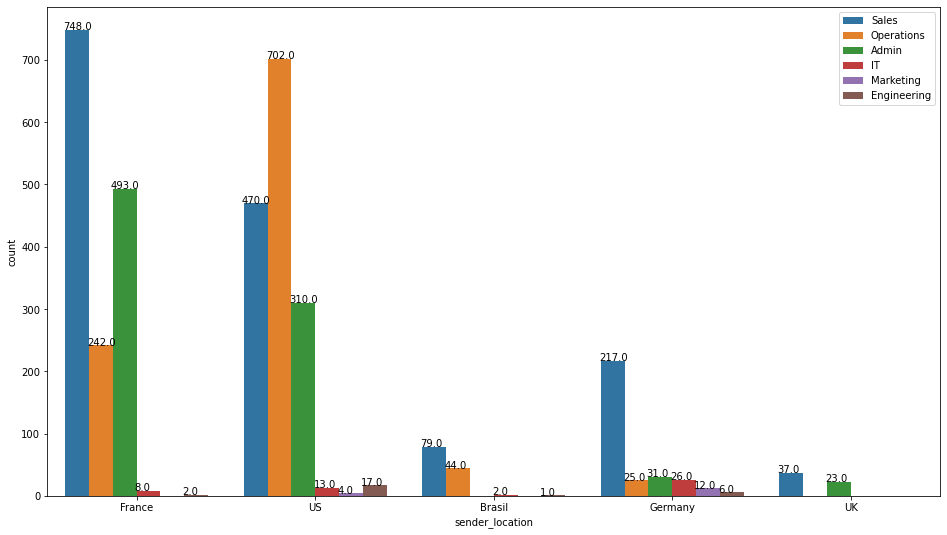

In [28]:
# Sender Location that Grouped by Sender_ Departments
fig,ax = plt.subplots(figsize=(16,9))
order1 = ['Sales','Operations','Admin','IT','Marketing','Engineering']
ax = sns.countplot(data=df, x=df['sender_location'],hue='sender_department',hue_order=order1)
plt.legend(loc='upper right')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()- 0.01, p.get_height()+ 0.03));


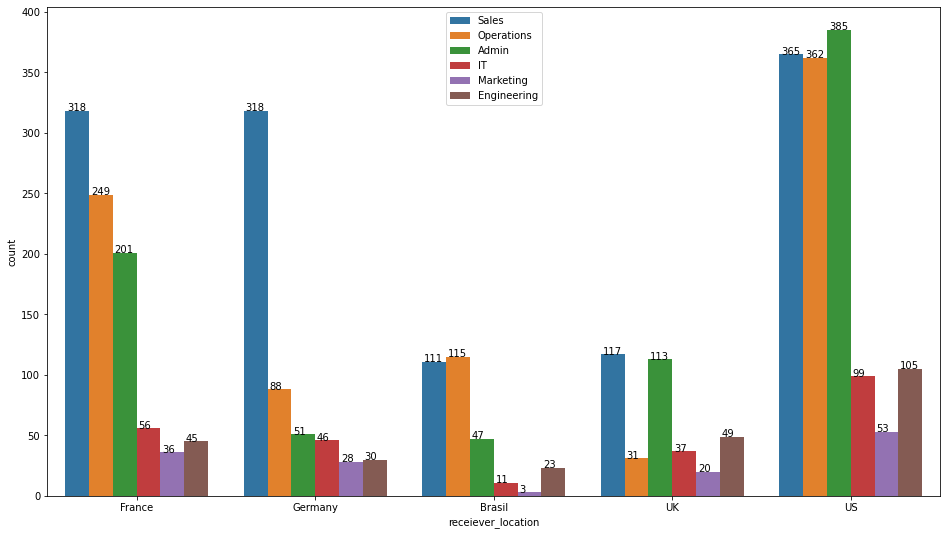

In [29]:
fig,ax = plt.subplots(figsize=(16,9))
order1 = ['Sales','Operations','Admin','IT','Marketing','Engineering']
ax = sns.countplot(data=df, x=df['receiever_location'],hue='receiver_department',hue_order=order1)
plt.legend(loc='upper center')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+ 0.01, p.get_height() + 0.1));


In [30]:
df.head()

,sender_id,timestamp,message_length,sender_department,sender_location,reciever_id,receiver_department,receiever_location
0,79,2021-06-02 05:41:34,88,Sales,France,48,IT,France
1,79,2021-06-02 05:42:15,72,Sales,France,63,Sales,France
2,79,2021-06-02 05:44:24,86,Sales,France,58,Sales,Germany
3,79,2021-06-02 05:49:07,26,Sales,France,70,Operations,France
4,79,2021-06-02 19:51:47,73,Sales,France,109,Marketing,Brasil


In [31]:
pd.DataFrame(df.groupby('sender_location')['sender_department'].value_counts(ascending=False))

sender_department
sender_location sender_department                   
Brasil          Sales                             79
                Operations                        44
                IT                                 2
                Engineering                        1
France          Sales                            748
                Admin                            493
                Operations                       242
                IT                                 8
                Engineering                        2
Germany         Sales                            217
                Admin                             31
                IT                                26
                Operations                        25
                Marketing                         12
                Engineering                        6
UK              Sales                             37
                Admin                             23
US              Operations                       702
                Sales                            470
                Admin                            310
                Engineering                       17
                IT                                13
                Marketing                          4